<h2 style="text-align: center;">Gráficos y correlación</h2>

### Autor: Francisco Lackington

## Contexto

- La base de datos contiene información a nivel mundial sobre demografía:
    - `country` : País.
    - `region`  : Continente del país.
    - `gdp`     : Producto Interno Bruto per cápita, precios 2005.
    - `school`    : Promedio años de escolaridad.
    - `adfert`    : Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
    - `chldmort`  : Probabilidad de muerte antes de los 5 años por cada 1000.
    - `life`      : Esperanza de vida al nacer.
    - `pop`       : Población total.
    - `urban` : Porcentaje de población urbana.
    - `femlab` : Tasa entre hombres y mujeres en el mercado laboral.
    - `literacy` : Tasa de alfabetismo.
    - `co2` : Toneladas de Co2 mitidas per cápita.
    - `gini` : Coeficiente de desigualdad del ingreso.
    

In [1]:
# Importar módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import funciones as fn

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Generando DataFrame
df = pd.read_csv("nations.csv", encoding="latin1")
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [3]:
# Eliminando la columna 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [5]:
# Aplicamos estilos de gráficos para todo el notebook

plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (5,2) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 100 # resolución gráficos

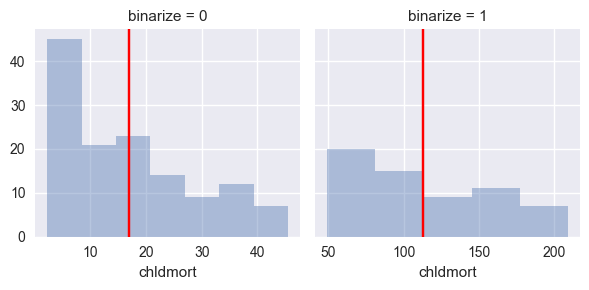

In [6]:
# Generamos histograma para la variable 'chldmort'
fn.binarize_hist(df, 'chldmort')

**Comentarios:**

chldmort: Probabilidad de muerte antes de los 5 años por cada 1000.

- Se puede observar que para todos aquellos datos inferior al promedio de chldmort (binarize = 0) la distribución de los datos tiende a estar cargada hacia la izquierda de la media de dicha muestra. 
- Por otra parte, cuando los datos estan sobre el promedio de chldmort (binarize = 1), la distribucion tiende a estar un poco mas equilibrada, aunquee aun cargandose hacia la izquierda de la media de dicha muestra.

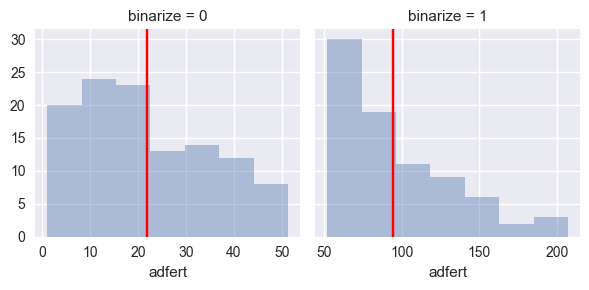

In [7]:
fn.binarize_hist(df, 'adfert')

**Comentarios:**

adfert: Fertilidad adolescente

- Se puede observar que para todos aquellos datos inferior al promedio de adfert (binarize = 0) la distribución de los datos tiende a estar cargada hacia la izquierda de la media de dicha muestra, presentando algunos peak en torno a los valores de 10. 
- Por otra parte, cuando los datos estan sobre el promedio de adfert (binarize = 1), se observa que estan claramente cargados hacia la izquierda de la media, pero disminuyendo considerablemente la frecuencia para valores superiores a esta.
- Se puede apreciar que una gran cantidad de datos se concentran en valores sobre los 20 y 100 para fertilidad adolescente.

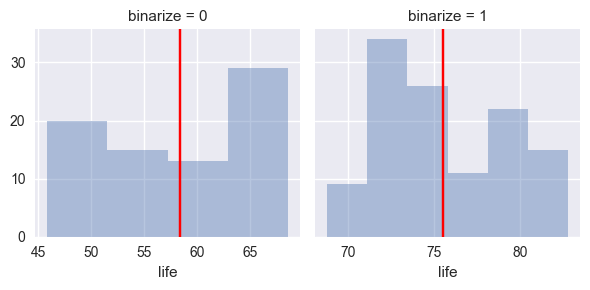

In [8]:
fn.binarize_hist(df, 'life')

**Comentarios:**

life: Esperanza de Vida

- Se puede observar que para todos aquellos datos inferior al promedio de life (binarize = 0) la distribución de los datos tiende a estar mas bien equilibrada, con leevee tendencia hacia valores superiores a la media.
- Por otra parte, cuando los datos estan sobre el promedio de life (binarize = 1), la distribucion tiende a estar cargada hacia la izquierda de la media, pero se tienen algunos peak de frecuencia en valores sobre la media de dicha variable.

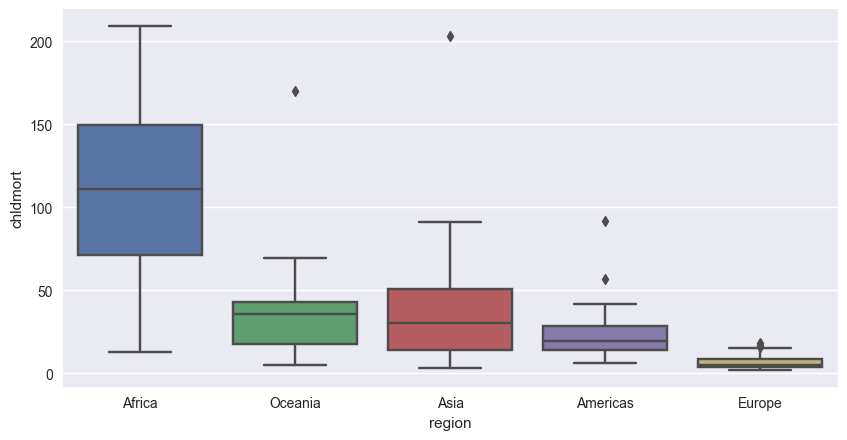

In [9]:
fn.group_boxplot(df, 'chldmort', 'region')

**Comentarios:**

- Se observa que para la variable chldmort, el continente de Africa es quien presenta la mayor mediana y varianza entre los datos presentados.
- Europa presenta una muy baja varianza entre los datos expuestos presentados
- Se observa que Oceania, Asia y America presenta algun(os) valores outliers, que se deberían revisar mas en detalle para un posterior modelo. La mediana de estos tres continentes es muy similar y se encuentra en rangos menores a 50 y superiores a 25.

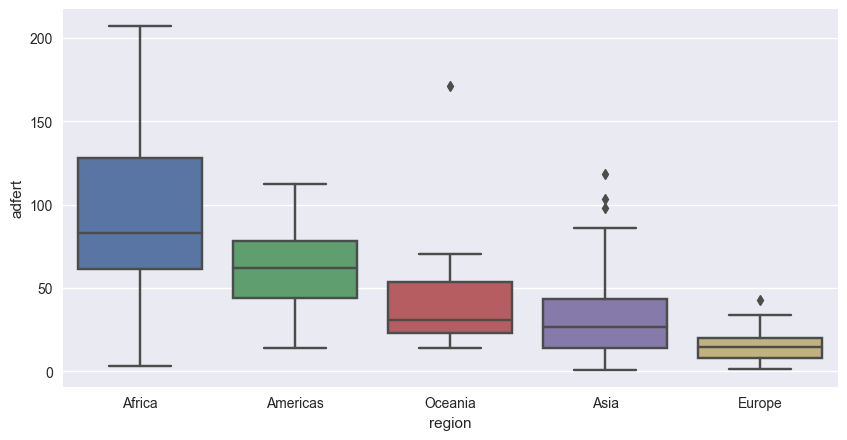

In [11]:
fn.group_boxplot(df, 'adfert', 'region')

**Comentarios:**

- Se observa que para la variable adfert, el continente de Africa es quien presenta la mayor mediana y varianza entre los datos presentados.
- Por otra parte, America concentra el 50% de sus datos de fertilidad adolescente sobre los 65.
- Oceania, Asia y Europa presentan una fertilidad adolescente inferior a 50 y Europa es quien presenta la menor varianza entre sus datos.

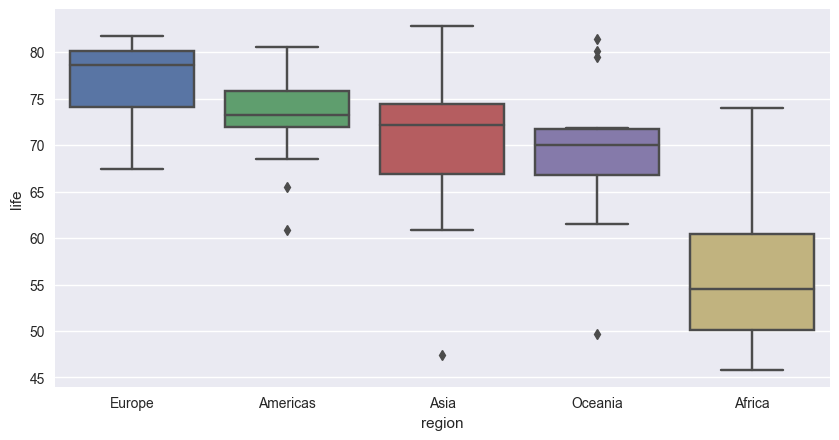

In [12]:
fn.group_boxplot(df, 'life', 'region')

**Comentarios:**

- Se observa que para la variable life, el continente de Africa es quien concentra el 50% de sus resgistros para valores inferiores a 55 en esperanza de vida y muy pocos llegan a vivir sobre los 70 años.
- Europa es el continente con una mayor esperanza de vida, mostrando que el 50% de sus registros están en valores sobre los 78 años.

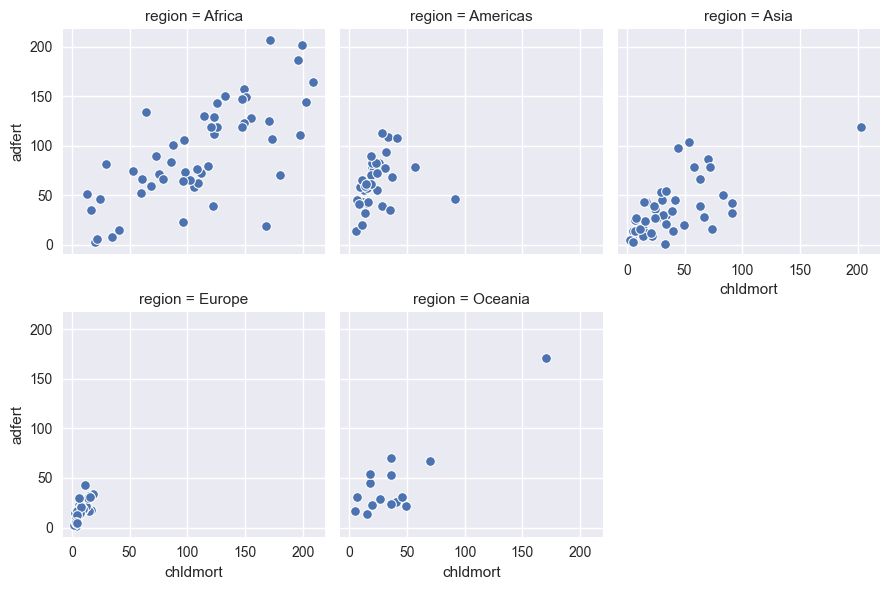

In [13]:
fn.grouped_scatterplot(df, 'chldmort', 'adfert', 'region')

**Comentarios:**

- Se observa que para todos los continentes las variables chldmort y adfert viejan en el mismo sentido (positivo).
- Para el continente de Afriva, se observa una gran varianza entre la relación de dichas variables.
- Para Europa, se observa como los datos se agrupan en valores bajos para probabilidad de muerte antes de loss 5 años y fertilidad adolescente.
- Para America se observa que a medida que la probabilidad de muerte antes de los 5 años aumenta, la fertilidad adolescente aumenta en mayor cuantia y unos pocos valores se alejan de dicha relación.

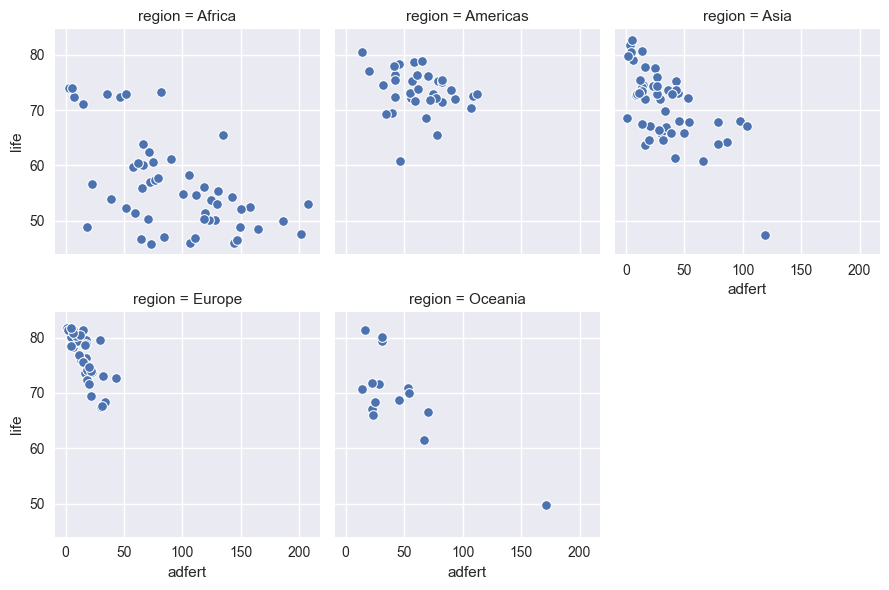

In [14]:
fn.grouped_scatterplot(df, 'adfert', 'life', 'region')

**Comentarios:**

- Se observa que para todos los continentes la relación entre adfert y life es negativa pero en el mismo sentido.
- Para Europa se observa que a medida que aumenta la fertilidad adolescente, la esperanza de vida se reeduce, posiblemente n una relacion lineal muy ajustada.
- Parra Africa se observa una gran varianza entre la relacion de dichas variables.
- Para America, a medida que aumenta la fertilidad adoleescente, los datos tienden a mantenerse en un rango entre los 70 y 80 años de esperanza de vida.

## Heatmap


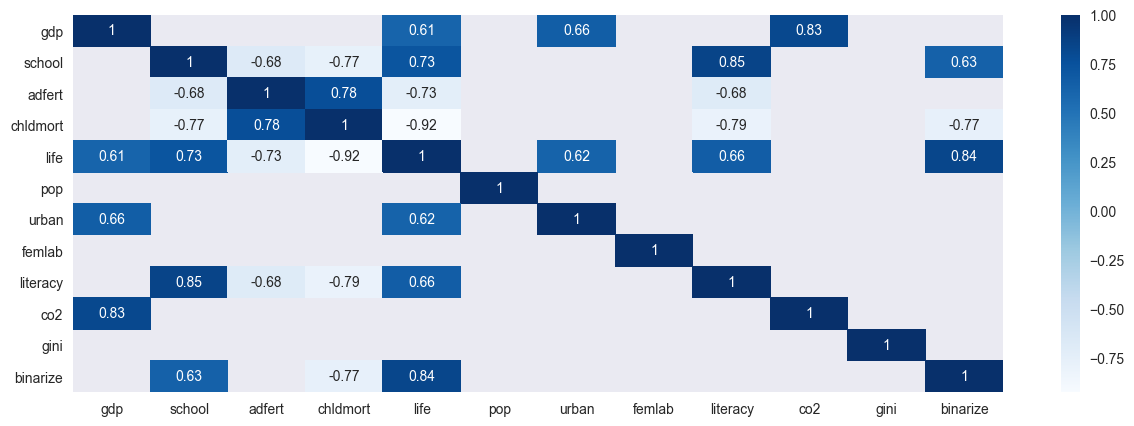

In [15]:
# Generar Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(fn.high_correlation(df, 0.6), cmap = 'Blues', annot = True)
plt.show()

**¿Cuáles son las principales correlaciones existentes?**

- Se observa que las correlaciones mas altas son para school-literacy (0.85), co2 - gdp (0.83), chldmort-literacy (-0.79) y life-chldmort (-0.92).
- Se observa que existen varias relaciones sobre los 0.6 se correlacion que fue el corte para este estudio.

In [16]:
# Generar subset conteniendo solo las columnas con alta correlación y region
# Se consideran aquellas variables con correlacion sobre 0.75

subset_high = df.loc[:, ['region', 'literacy', 'co2', 'life', 'school', 'gdp', 'chldmort', 'adfert']]

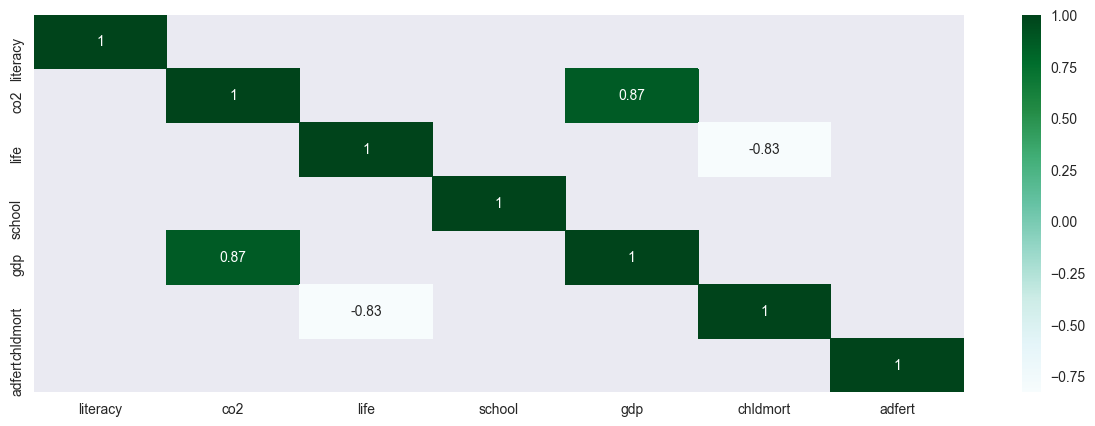

In [17]:
# Heatmap para África
africa = subset_high[subset_high['region'] == 'Africa']
plt.figure(figsize=(15,5))
sns.heatmap(fn.high_correlation(africa, .8), cmap = 'BuGn', annot = True)
plt.show()

**Comentarios**

- Para Africa se observa que la corelacion entre gdp-co2 (0.87) y life-chldmort (-0.83) son las mas altas observadas en el conjunto de datos. 

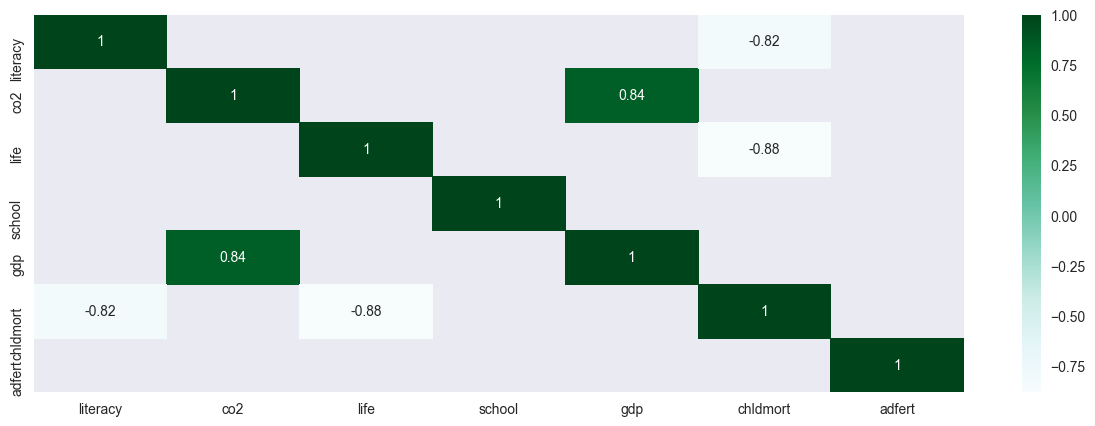

In [18]:
# Heatmap para Americas
america = subset_high[subset_high['region'] == 'Americas']
plt.figure(figsize=(15,5))
sns.heatmap(fn.high_correlation(america, .8), cmap = 'BuGn', annot = True)
plt.show()

**Comentarios**
- Para america al igual que en Africa las correlaciones entre gdp- co2 y life-chldmort son altas, se agrega aquella que tiene relacion con chldmort y literacy con (-0.82)

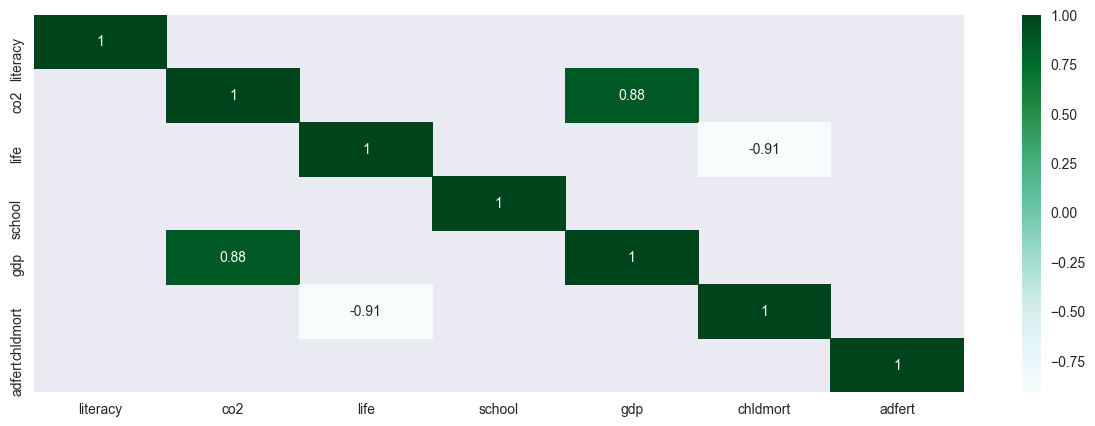

In [19]:
# Heatmap para Asia
asia = subset_high[subset_high['region'] == 'Asia']
plt.figure(figsize=(15,5))
sns.heatmap(fn.high_correlation(asia, .8), cmap = 'BuGn', annot = True)
plt.show()

**Comentarios**
- Se observan valores altos de correlacion en las variables gdp-co2 y chldmort y life bordenado valorees por 0.9 en dichas correlaciones, ílao cual podr indicar que que una de eellas se podría explicar perfeectament el conjunto de datos.

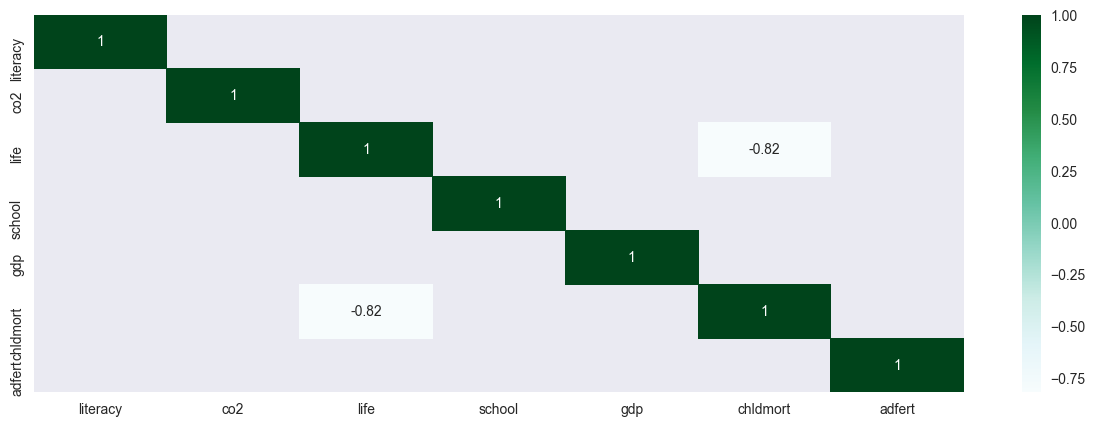

In [20]:
# Heatmap para Europa
europe = subset_high[subset_high['region'] == 'Europe']
plt.figure(figsize=(15,5))
sns.heatmap(fn.high_correlation(europe, .8), cmap = 'BuGn', annot = True)
plt.show()

**Comentarios**
- Para Europa la correlacion mas alta que existe es entre chldmort y life (-0.82)

In [ ]:
# Heatmap para Oceanía
oceania = subset_high[subset_high['region'] == 'Oceania']
plt.figure(figsize=(15,5))
sns.heatmap(high_correlation(oceania, .8), cmap = 'BuGn', annot = True)
plt.show()

**Comentarios**
- Para Oceania se observa una mayor cantidad de variables correlacionadas con valores sobre el 0.8, pero destacando claramente school-literacy y gdp-co2 con valores sobre 0.95

***Conclusion Final***
- Si bien existen continentes que presentan mas o menos variables correlacionadas con valores sobre 0.8, aquellas variables gdp-co2 y chldmort-life se presenta en todos los continentes y con valores altos de correlacion. Estas serian variables a considerar para ajustar los modelos a entrenar en un futuro, dado que la explicacion podría darse solo por una de ellas (PCA)

## Diagramas de dispersión para los principales hallazgos.

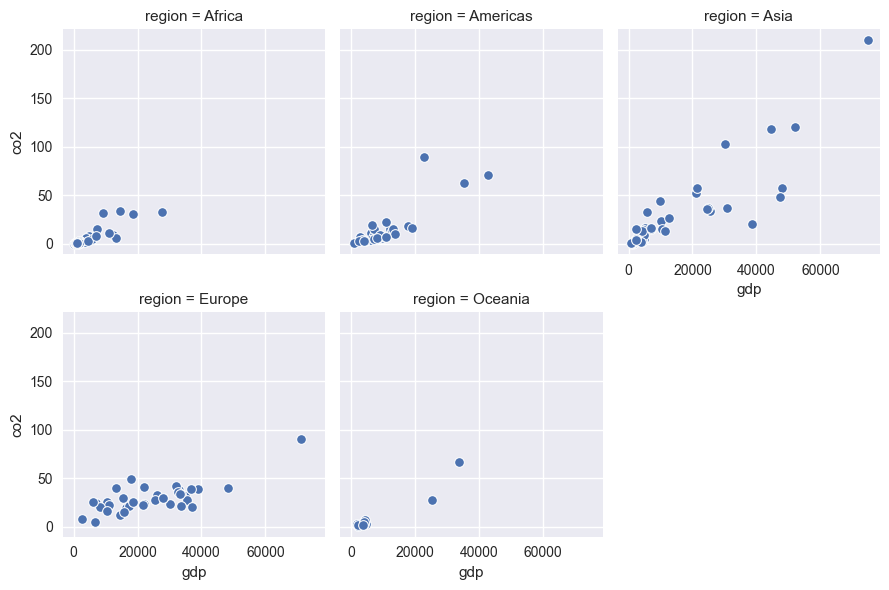

In [21]:
fn.grouped_scatterplot(df, 'gdp', 'co2', 'region')

***Comentario***
- Se observa una relacion lineal muy ajustada a los datos presentados, dado que la varianza entre dichas variables es muy baja, solo presentado un pequeño grupo de valores outliers.

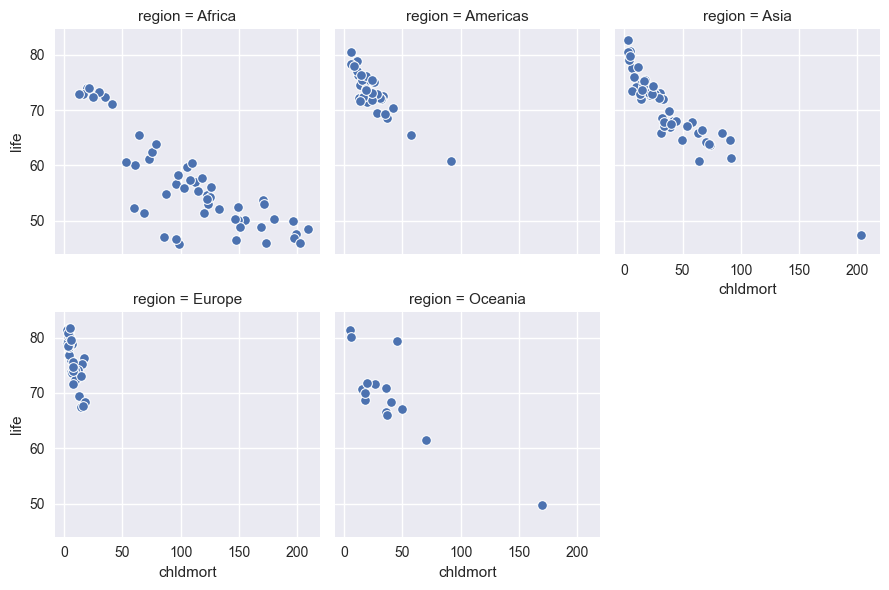

In [22]:
fn.grouped_scatterplot(df, 'chldmort', 'life', 'region')

***Comentario***
- Se observa una relacion lineal muy ajustada a los datos presentados, dado que la varianza entre dichas variables es muy baja, solo presentado un pequeño grupo de valores outliers. Para estos casos de utliers, conviene revisarlos para ver que no sean errores de tipeo u otro error manual de levantamiento de información